<a href="https://colab.research.google.com/github/Joycechidi/Secure-and-Private-AI/blob/master/handwritten_digits_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://github.com/udacity/deep-learning-v2-pytorch/raw/master/intro-to-pytorch/helper.py

--2019-07-04 01:33:33--  https://github.com/udacity/deep-learning-v2-pytorch/raw/master/intro-to-pytorch/helper.py
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py [following]
--2019-07-04 01:33:33--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py.1’

helper.py.1         100%[===================>]   2.75K  --.-KB/s    in 0s      

2019-07-04 01:33:33 (41.6 MB/s) - ‘helper.py.1’ saved [2813

In [0]:
#Import necessary packaages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import matplotlib.pyplot as plt

In [0]:
import helper

In [0]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,), (0.5,)),
                               ])

# #Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [0]:
#for image, label in trainloader:
  

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [0]:
def activation(x):
    return 1/(1+torch.exp(-x))    #Sigmoid activation function

#Flatten the input imges. Chooses the appropriate size for the number of elements
inputs = images.view(images.shape[0], -1)
n_input = 784
n_hidden = 256
n_output = 10

#Create parameters

W1 = torch.randn(n_input, n_hidden)
B1 = torch.randn(n_hidden)

#Weights for inputs to hidden layer
W2 = torch.randn(n_hidden, n_output)
B2 = torch.randn(n_output)

h = activation(torch.mm(inputs, W1) + B1)

output = torch.mm(h, W2) + B2

print(output.shape)


torch.Size([64, 10])


In [0]:
print(output)

tensor([[ 2.3972e+00,  1.3427e+01, -6.6107e+00,  9.5487e+00, -7.1117e+00,
         -5.2640e+00, -7.9234e+00,  3.2493e+00,  4.8567e+00,  3.3421e+00],
        [-1.5212e+00,  1.5947e+00, -1.2279e+01,  9.5108e+00,  2.0851e+00,
         -4.2515e+00, -1.0986e-01,  1.6105e+01,  1.3594e+00,  7.6460e-01],
        [ 7.2615e+00,  1.1990e+01, -2.2577e+01,  2.1061e+01,  2.9824e+00,
         -3.3917e+00, -2.0667e+00,  1.0773e+01,  8.0101e+00,  1.1416e+00],
        [-7.7161e-01,  1.1887e+01, -1.3216e+01,  2.3681e+01,  3.5582e+00,
         -1.3777e+00, -9.9416e+00,  1.7063e+01,  1.2542e+01,  8.8278e-01],
        [ 7.1930e-01,  5.6023e+00, -2.1244e-01,  1.8990e+01,  1.4171e+00,
         -1.2687e+01, -7.9640e-01,  1.8669e+01,  6.5251e+00,  1.8570e+00],
        [-9.9923e-01,  3.2474e+00, -7.5639e+00,  2.1117e+01,  3.5643e+00,
         -1.0359e+01, -2.4891e+00,  1.0004e+01,  6.3324e+00, -3.9626e+00],
        [ 1.1020e+00,  7.6313e+00, -6.1607e+00,  1.3559e+01,  7.9078e+00,
         -1.0163e+01, -8.0285e+0

Here's what one of the images looks like

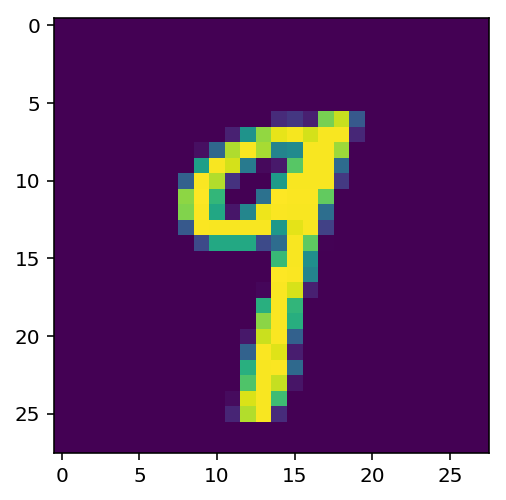

In [0]:
plt.imshow(images[1].numpy().squeeze())

In [0]:
#Implement a softmax
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(output)

#Does it have the right shape? Should be (64, 10)
print(probabilities.shape)

#Does it sum to 1?
print(probabilities.sum(dim=1))

**Building networks with PyTorch**

The PyTorch model makes building networks much simpler.


In [0]:
from torch import nn

In [0]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    
    
    #Inputs to hidden layer linear transformation
    self.hidden = nn.Linear(n_input, n_hidden)
    
    #Output Layer, 10 units - one for each digit
    self.output = nn.Linear(n_hidden, n_output)
    
    #Define sigmoid activation and softmax output
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)
    
    
    
    def forward(self, x):
      #Pass the input tensor through each of the operations
      x = self.hidden(x)
      x = self.sigmoid(x)
      x = self.output(x)
      x = self.softmax(x)
      
      return x

In [0]:
#Create the network and look at its text representation
model = Classifier()
model

Classifier(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

The neural network can also be written in a more cleaner and concise way using **torch.nn.functional** module

In [0]:
import torch.nn.functional as F

class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    
    #Inputs to hidden layer linear transformation
    self.hidden = nn.Linear(n_input, n_hidden)
    
    #Output layer, 10 units - one for each digit
    self.output = nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
      #Hidden layer with sigmoid activation
      x = F.sigmoid(self.hidden(x))
      #Output layer with softmax activation
      x = F.softmax(self.output(x), dim=1)
      
      return x

In [0]:
#If you want non-linear out